# HOG of image:

In [11]:
# imports
import os
from os import listdir
from os.path import isfile, join

import numpy as np
from scipy import stats
import pickle

import pandas as pd
from skimage import (io, feature, color, exposure)
from skimage.transform import resize
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
# consts:
dataset_path = '/Users/nikhilarora/data/fydp/dataset'
car_b_path = '/Users/nikhilarora/data/fydp/dataset/car'
ncar_b_path = '/Users/nikhilarora/data/fydp/dataset/ncar'

In [8]:
# get all files from dir:
carfiles = [f for f in listdir(car_b_path) if isfile(join(car_b_path, f))]
ncarfiles = [f for f in listdir(ncar_b_path) if isfile(join(ncar_b_path, f))]

In [9]:
# read files into image list:
car_imgs = [io.imread(join(car_b_path, f)) for f in carfiles]
ncar_imgs = [io.imread(join(ncar_b_path, f)) for f in ncarfiles]

In [10]:
# define container to store hog feature vect and label
feature_vs = []
lbls = []

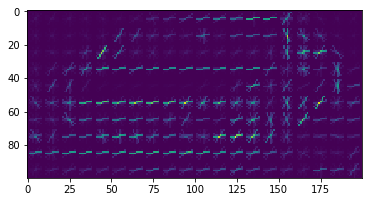

In [22]:
# first process event instances
im = ncar_imgs[10]
gray = color.rgb2gray(im)
# NOTE: might need to do the whole contour thing, can see later...
gray_rs = resize(gray, (100, 200), mode='constant')
plt.imshow(gray_rs,cmap='gray')
    

(H, hogImage) = feature.hog(gray_rs, orientations=9, pixels_per_cell=(10, 10),\
        cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys', visualise=True)

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
plt.imshow(hogImage)
#     cl = 1
#     feature_vs.append(H)
#     lbls.append(cl)
    
# # extract Histogram of Oriented Gradients from the test image and
# # predict the make of the car
# (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
#     cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
# 	pred = model.predict(H.reshape(1, -1))[0]
 
# 	# visualize the HOG image
# 	hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
# 	hogImage = hogImage.astype("uint8")
# 	cv2.imshow("HOG Image", hogImage)